In [1]:
# Nativos
import os
import sys

#calculo
import numpy as np
import pandas as pd
from IPython.display import display

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
warnings.filterwarnings('ignore')

from extract import MYExtract
from compare_for_day_000 import compare_result, noise_control, calc_result
np.random.seed(123)

# **CARGA DE DATA**

In [2]:
df_global = pd.read_csv('all_peru21.csv', parse_dates=['Fecha'])
df_global.index = df_global['Fecha']
df_global['weekday'] = df_global['Fecha'].dt.weekday
df_global = df_global.sort_index()

del df_global.index.name
df_global.head()

,Producto,Fecha,CodigoSapAgencia,NombreAgencia,CodigoSapCanilla,NombreCanilla,Pauta,Devolucion,VentaNeta,Lim. Inf Vta. Proy,Vta. Proy,Lim. Sup Vta. Proy,weekday
2018-01-01,Peru 21,2018-01-01,1200000065,CALLAO,1300000005,ABANTO LECCA LIDIA,2,2,0,NaN,NaN,NaN,0
2018-01-01,Peru 21,2018-01-01,1200000077,LOS OLIVOS,1300005097,PALOMINO RAMIREZ DIANA,0,0,0,NaN,NaN,NaN,0
2018-01-01,Peru 21,2018-01-01,1200000077,LOS OLIVOS,1300004633,MORENO ALVA MARIA ANASTACIA,10,1,9,NaN,NaN,NaN,0
2018-01-01,Peru 21,2018-01-01,1200000077,LOS OLIVOS,1300004632,MORENO ALVA JULIO,10,2,8,NaN,NaN,NaN,0
2018-01-01,Peru 21,2018-01-01,1200000077,LOS OLIVOS,1300004628,MORALES VILLALOBOS LOURDES V.,0,0,0,NaN,NaN,NaN,0


#### **OBSERVACION, por casos de datos faltantes**

In [3]:
col_proy = 'Vta. Proy'
col_venta = 'VentaNeta'
col_pauta = 'Pauta'

In [4]:
df_global[df_global['CodigoSapCanilla'] == 1300000384][[col_pauta, col_venta, col_proy]].tail(15)

,Pauta,VentaNeta,Vta. Proy
2019-01-20,2,1,NaN
2019-01-21,1,0,0.000000
2019-01-22,1,0,0.000000
2019-01-23,1,0,0.000000
2019-01-24,0,0,0.000000
2019-01-25,0,0,0.000000
2019-01-26,0,0,0.000000
2019-01-27,2,1,1.053747
2019-01-28,0,0,0.000000
2019-01-29,0,0,0.000000


In [5]:
for cc in [1300002282,1300002397,1300002898,1300005286,
           1300005692,1300005969,1300011566,1300011920,
           1300012212,1300012650,1300012838,1300013177,
           1300013254,1300013469,1300013484,1300013547]:
    display(df_global[df_global['CodigoSapCanilla'] == cc][
        [col_pauta, col_venta, col_proy]].tail(15))


,Pauta,VentaNeta,Vta. Proy
2018-11-24,15,12,NaN
2018-11-25,3,3,NaN
2018-11-26,20,17,NaN
2018-11-27,20,14,NaN
2018-11-28,19,12,NaN
2018-11-29,15,14,NaN
2018-11-30,16,14,NaN
2018-12-01,11,10,NaN
2018-12-02,5,5,NaN
2018-12-03,17,17,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-18,7,6,NaN
2018-01-19,10,6,NaN
2018-01-20,0,0,NaN
2018-01-21,5,3,NaN
2018-01-22,10,6,NaN
2018-01-23,6,2,NaN
2018-01-24,10,7,NaN
2018-01-25,8,7,NaN
2018-01-26,11,9,NaN
2018-01-27,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-09,0,0,NaN
2018-01-10,0,0,NaN
2018-01-11,0,0,NaN
2018-01-12,0,0,NaN
2018-01-13,0,0,NaN
2018-01-14,0,0,NaN
2018-01-15,0,0,NaN
2018-01-16,0,0,NaN
2018-01-17,0,0,NaN
2018-01-18,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-02-19,0,0,NaN
2018-02-20,0,0,NaN
2018-02-21,0,0,NaN
2018-02-22,0,0,NaN
2018-02-23,0,0,NaN
2018-02-24,0,0,NaN
2018-02-25,0,0,NaN
2018-02-26,0,0,NaN
2018-02-27,0,0,NaN
2018-02-28,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-09,0,0,NaN
2018-01-10,0,0,NaN
2018-01-11,0,0,NaN
2018-01-12,0,0,NaN
2018-01-13,0,0,NaN
2018-01-14,0,0,NaN
2018-01-15,0,0,NaN
2018-01-16,0,0,NaN
2018-01-17,0,0,NaN
2018-01-18,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-08-13,0,0,NaN
2018-08-14,0,0,NaN
2018-08-15,0,0,NaN
2018-08-16,0,0,NaN
2018-08-17,0,0,NaN
2018-08-18,0,0,NaN
2018-08-19,0,0,NaN
2018-08-20,0,0,NaN
2018-08-21,0,0,NaN
2018-08-22,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-09,0,0,NaN
2018-01-10,0,0,NaN
2018-01-11,0,0,NaN
2018-01-12,0,0,NaN
2018-01-13,0,0,NaN
2018-01-14,0,0,NaN
2018-01-15,0,0,NaN
2018-01-16,0,0,NaN
2018-01-17,0,0,NaN
2018-01-18,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-08-13,0,0,NaN
2018-08-14,0,0,NaN
2018-08-15,0,0,NaN
2018-08-16,0,0,NaN
2018-08-17,0,0,NaN
2018-08-18,0,0,NaN
2018-08-19,0,0,NaN
2018-08-20,0,0,NaN
2018-08-21,0,0,NaN
2018-08-22,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-06-16,4,2,NaN
2018-06-17,2,2,NaN
2018-06-18,4,1,NaN
2018-06-19,1,0,NaN
2018-06-20,4,3,NaN
2018-06-21,0,0,NaN
2018-06-22,5,1,NaN
2018-06-23,4,3,NaN
2018-06-24,3,3,NaN
2018-06-25,3,1,NaN


,Pauta,VentaNeta,Vta. Proy
2018-06-16,1,0,NaN
2018-06-17,2,1,NaN
2018-06-18,1,0,NaN
2018-06-19,1,0,NaN
2018-06-20,1,0,NaN
2018-06-21,0,0,NaN
2018-06-22,2,0,NaN
2018-06-23,1,0,NaN
2018-06-24,2,1,NaN
2018-06-25,1,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-07-12,0,0,NaN
2018-07-13,0,0,NaN
2018-07-14,0,0,NaN
2018-07-15,0,0,NaN
2018-07-16,0,0,NaN
2018-07-17,0,0,NaN
2018-07-18,0,0,NaN
2018-07-19,0,0,NaN
2018-07-20,0,0,NaN
2018-07-21,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-03,0,0,NaN
2018-01-04,0,0,NaN
2018-01-05,0,0,NaN
2018-01-06,0,0,NaN
2018-01-07,0,0,NaN
2018-01-08,0,0,NaN
2018-01-09,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-05,0,0,NaN
2018-01-08,0,0,NaN
2018-01-09,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-07-12,0,0,NaN
2018-07-13,0,0,NaN
2018-07-14,0,0,NaN
2018-07-15,0,0,NaN
2018-07-16,0,0,NaN
2018-07-17,0,0,NaN
2018-07-18,0,0,NaN
2018-07-19,0,0,NaN
2018-07-20,0,0,NaN
2018-07-21,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-15,3,0,NaN
2018-01-16,2,0,NaN
2018-01-17,2,1,NaN
2018-01-18,1,0,NaN
2018-01-19,2,0,NaN
2018-01-20,2,1,NaN
2018-01-21,2,0,NaN
2018-01-22,2,0,NaN
2018-01-23,2,0,NaN
2018-01-24,2,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-06-19,0,0,NaN
2018-06-20,1,0,NaN
2018-06-21,0,0,NaN
2018-06-22,1,0,NaN
2018-06-23,1,0,NaN
2018-06-24,3,0,NaN
2018-06-25,1,0,NaN
2018-06-26,0,0,NaN
2018-06-27,1,0,NaN
2018-06-28,0,0,NaN


### Filtrado Preventivo

In [6]:
df = df_global[(df_global['Pauta'] > 0) | (df_global['VentaNeta'].notnull())]

if df.shape == df_global.shape:
    del df_global

df.shape

(295479, 13)

## Validacion de nulos Globales

In [7]:
df.isnull().sum(), df.shape

(Producto                   0
 Fecha                      0
 CodigoSapAgencia           0
 NombreAgencia              0
 CodigoSapCanilla           0
 NombreCanilla              0
 Pauta                      0
 Devolucion                 0
 VentaNeta                  0
 Lim. Inf Vta. Proy    285015
 Vta. Proy             285015
 Lim. Sup Vta. Proy    285015
 weekday                    0
 dtype: int64, (295479, 13))

## Configuracion

Se procede a realizar dos intervalos de validación

In [8]:
until_train_1 = '2019-01-20'
since_date_1 = '2019-01-21'
until_date_1 = '2019-01-27'

In [9]:
df.tail()

,Producto,Fecha,CodigoSapAgencia,NombreAgencia,CodigoSapCanilla,NombreCanilla,Pauta,Devolucion,VentaNeta,Lim. Inf Vta. Proy,Vta. Proy,Lim. Sup Vta. Proy,weekday
2019-02-03,Peru 21,2019-02-03,1200001015,CANTO GRANDE,1300012513,SALAZAR CORONEL VIRGILIO,2,0,2,0.000000,0.000000,0.000000,6
2019-02-03,Peru 21,2019-02-03,1200001015,CANTO GRANDE,1300012514,SALZAR VILCHEZ OSCAR VIRGILIO,1,0,1,0.694915,0.998889,1.302862,6
2019-02-03,Peru 21,2019-02-03,1200001015,CANTO GRANDE,1300012515,ROJAS BILBAO EMILIA,1,1,0,0.000000,0.000000,0.000000,6
2019-02-03,Peru 21,2019-02-03,1200001015,CANTO GRANDE,1300012232,OTERO SANCHEZ OMAR CESAR,1,1,0,0.316834,0.544568,0.772302,6
2019-02-03,Peru 21,2019-02-03,1200000043,MIRAFLORES 1,1300014543,ARANDA SOLANO EMPERADOR,3,0,3,1.534909,1.959923,2.384938,6


In [10]:
agencias_detectadas = df.groupby(by=['NombreAgencia'])['CodigoSapAgencia'].max()
agencias_detectadas

NombreAgencia
CALLAO          1200000065
CANTO GRANDE    1200001015
JESUS MARIA     1200000047
LINCE           1200000026
LOS OLIVOS      1200000077
MIRAFLORES 1    1200000044
Name: CodigoSapAgencia, dtype: int64

## Creación de contenedor de canillas por agencia

In [11]:
%%time
extractor_21_27 = MYExtract(df, since=since_date_1, until=until_date_1)

Detección de valores nulos en pronosticos o ventas netas


,Fecha,Vta. Proy,VentaNeta
CodigoSapCanilla,,,
1300002282,2018-12-09,NaN,20
1300002397,2018-02-03,NaN,14
1300002898,2018-01-23,NaN,0
1300005286,2018-03-05,NaN,4
1300005692,2018-01-23,NaN,0
1300005969,2018-08-27,NaN,6
1300011566,2018-01-23,NaN,15
1300011920,2018-08-27,NaN,24
1300012212,2018-07-01,NaN,4


Total canillas:  764
Canillas a analizar:  748
Columna de dias de semana creada
CPU times: user 67.9 ms, sys: 12.8 ms, total: 80.7 ms
Wall time: 77.2 ms


### JESUS MARIA

Total canillas en agencia:  157
Canillas a trabajar:  157
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-22    1
2018-12-29    1
2019-01-05    1
2019-01-12    1
2019-01-19    1
Name: VentaNeta, dtype: int64 num_day  5
Se detecto una relacion lineal :  2018-12-16    1
2018-12-23    1
2018-12-30    1
2019-01-06    1
2019-01-20    1
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6

 DETECCION DE CASO INVALIDO  1300003350
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////

 DETECCION DE CASO INVALIDO  1300011543

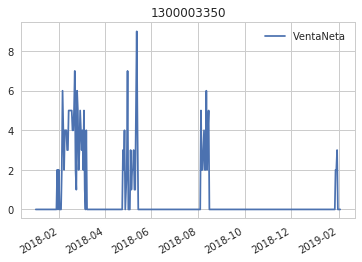

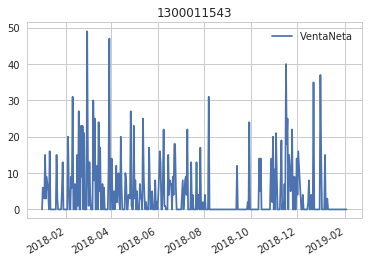

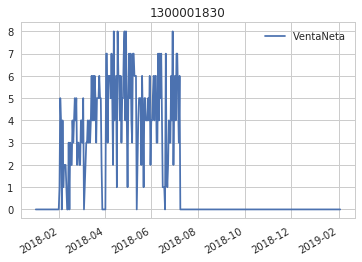

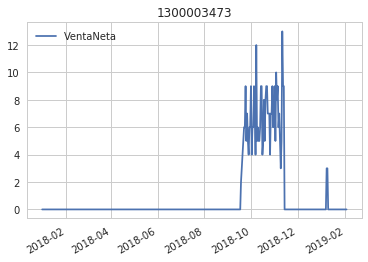

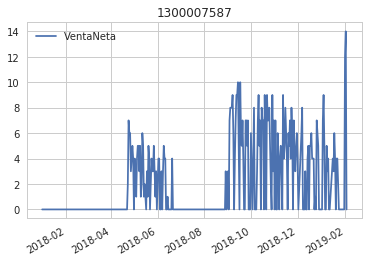

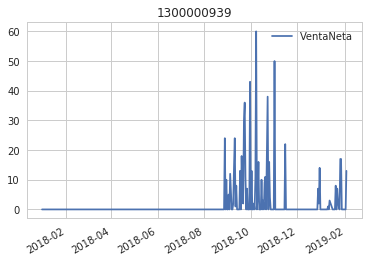

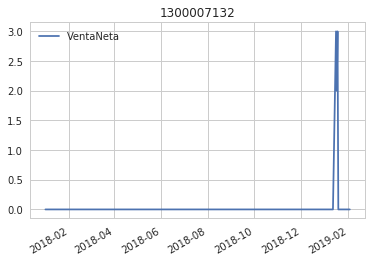

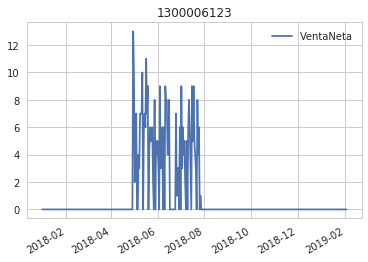

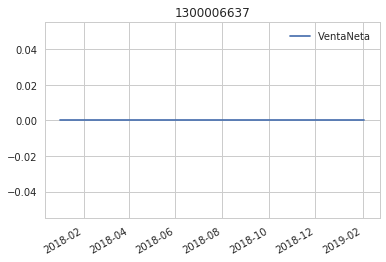

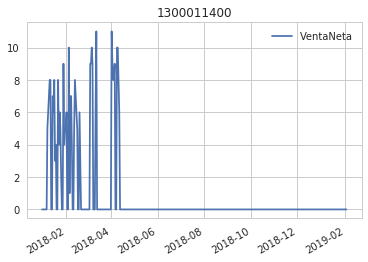

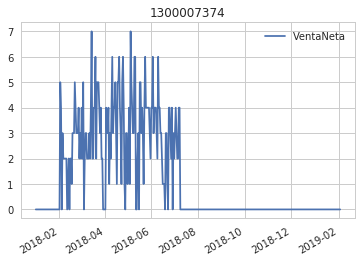

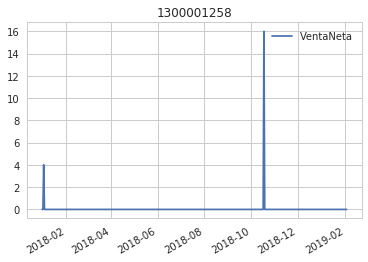

In [12]:
%%time
dicc_jesus_maria = extractor_21_27.populate_data(1200000047)

Total canillas en agencia:  161
Canillas a trabajar:  159

 DETECCION DE CASO INVALIDO  1300006402
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-19    1
2018-12-26    2
2019-01-02    0
2019-01-09    1
2019-01-16    1
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-1

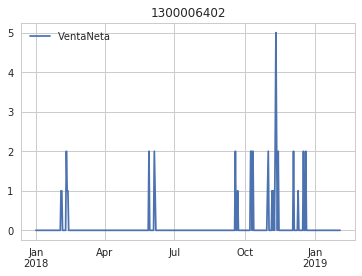

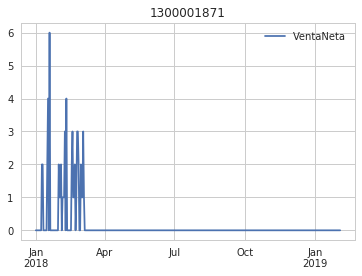

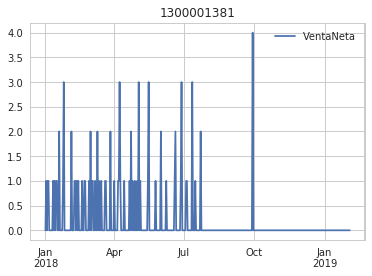

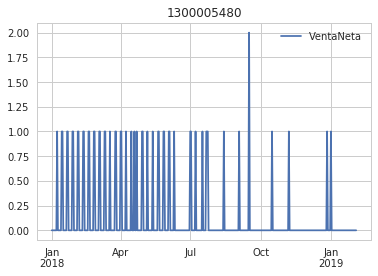

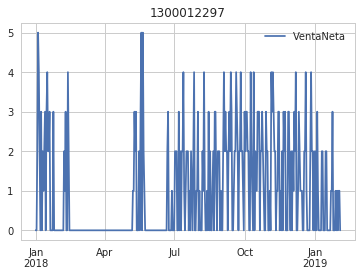

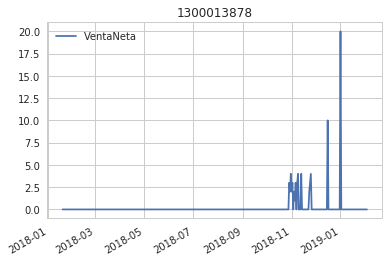

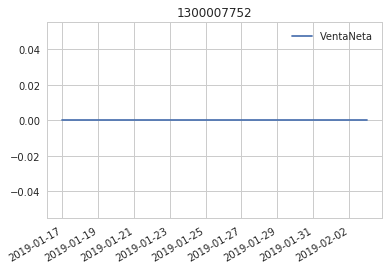

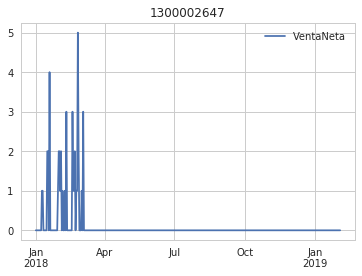

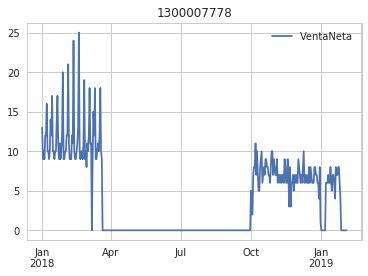

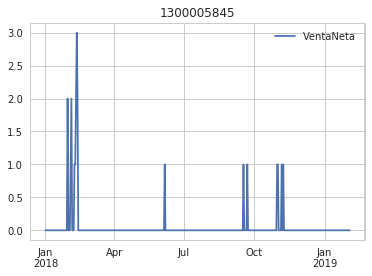

In [13]:
%%time
dicc_callao = extractor_21_27.populate_data(1200000065)

Total canillas en agencia:  72
Canillas a trabajar:  69
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5

 DETECCION DE CASO INVALIDO  1300012419
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    1
2018-12-31    1
2019-01-07    1
2019-01-14    1
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-

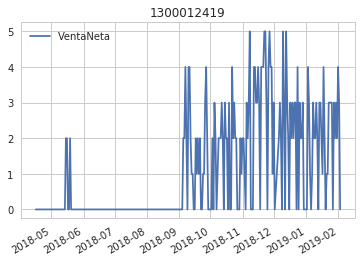

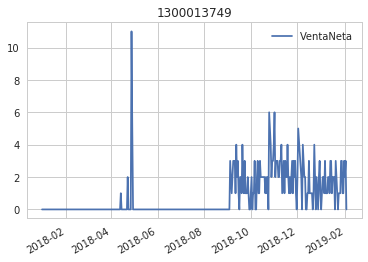

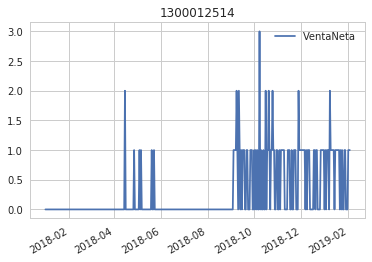

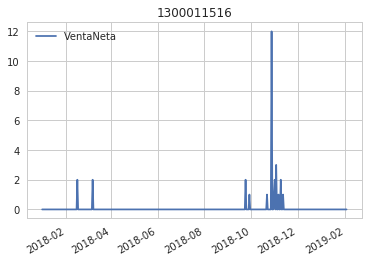

In [14]:
%%time
dicc_canto_grande = extractor_21_27.populate_data(1200001015)

Total canillas en agencia:  151
Canillas a trabajar:  151
Se detecto una relacion lineal :  2018-12-18    1
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1

 DETECCION DE CASO INVALIDO  1300004881
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6

 DETECCION DE CASO INVALIDO  1300012125
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////

 DETECCION DE CASO INVALIDO  1300002396
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    

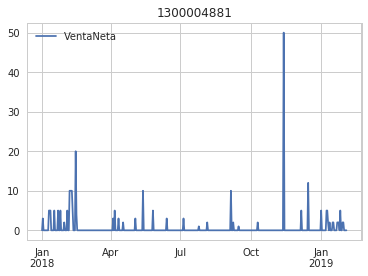

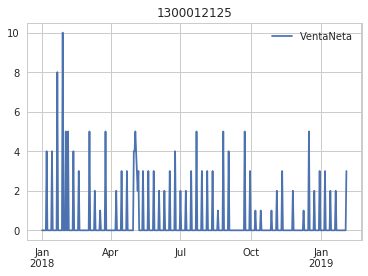

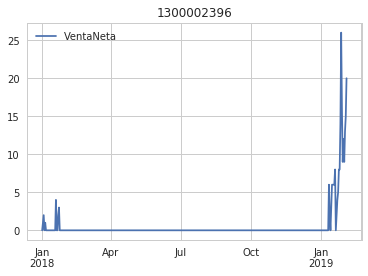

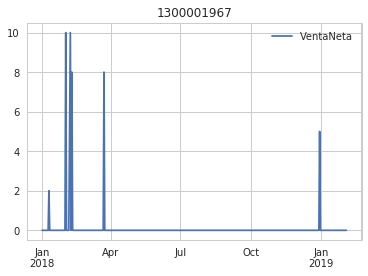

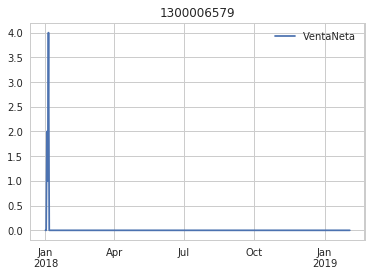

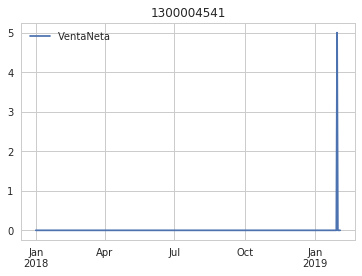

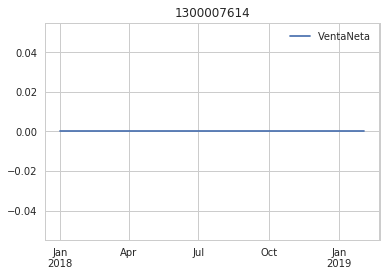

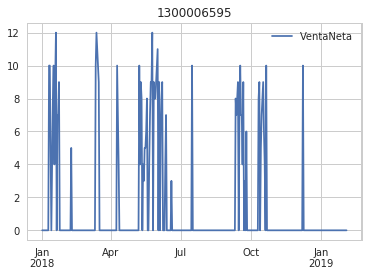

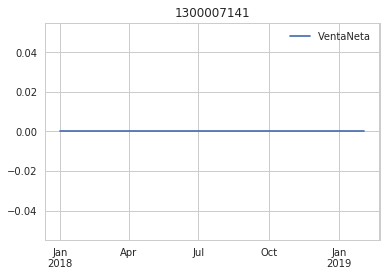

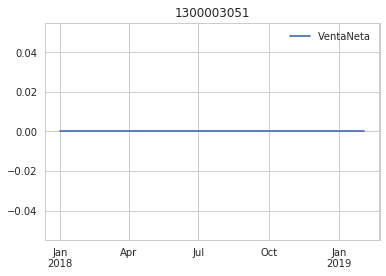

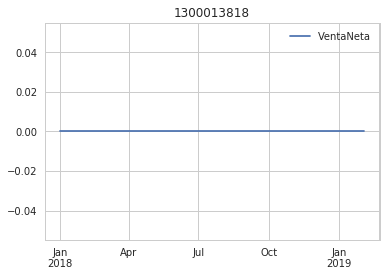

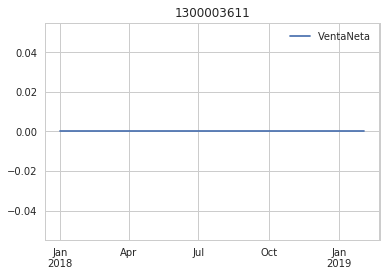

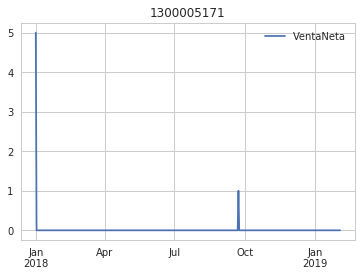

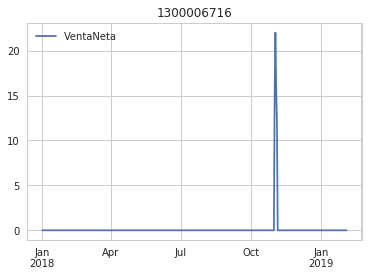

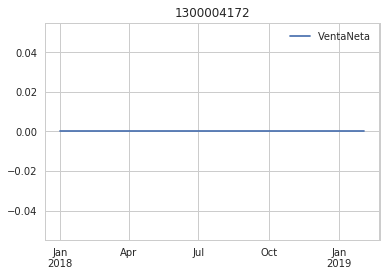

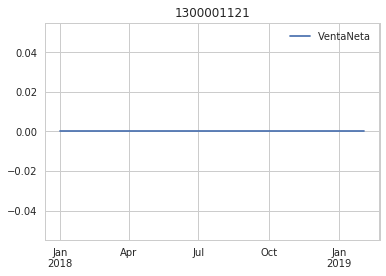

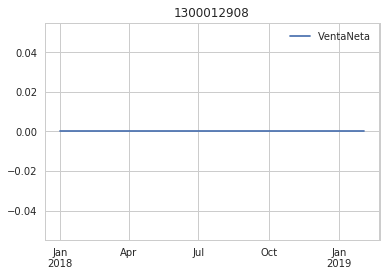

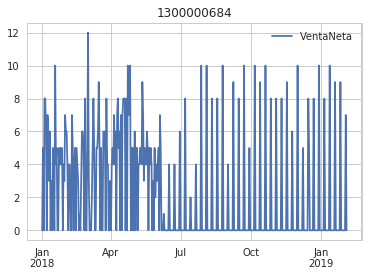

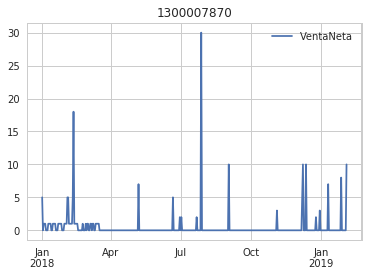

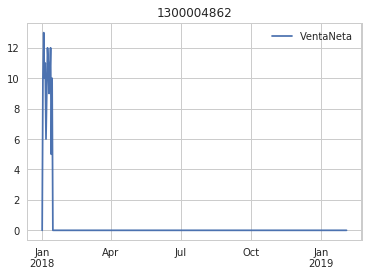

In [15]:
%%time
dicc_lince = extractor_21_27.populate_data(1200000026)

Total canillas en agencia:  101
Canillas a trabajar:  100
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5
Se detecto u

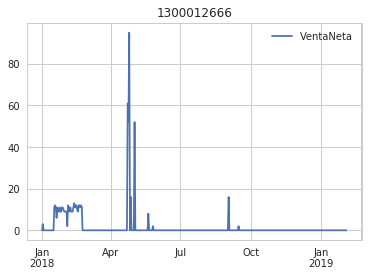

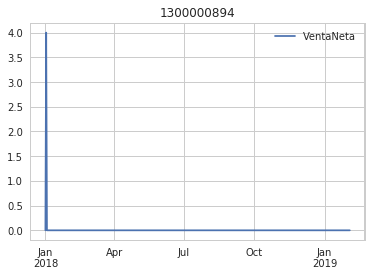

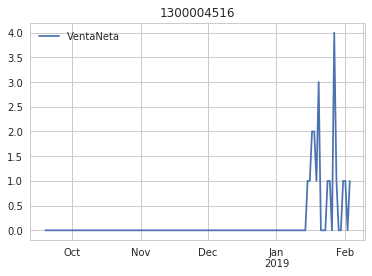

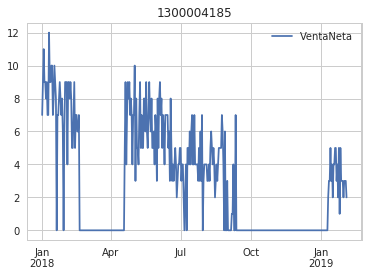

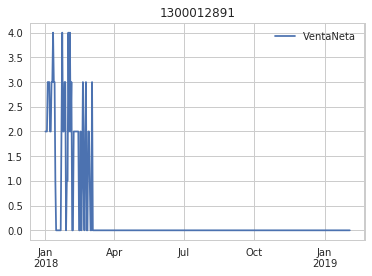

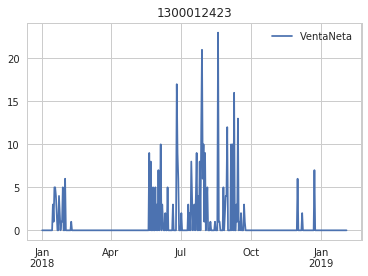

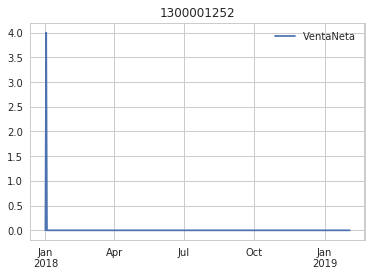

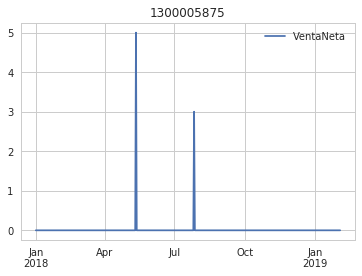

In [16]:
%%time
dicc_olivos = extractor_21_27.populate_data(1200000077)

Total canillas en agencia:  40
Canillas a trabajar:  37
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-18    5
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-18    0
2018-12-25    0
2019-01-01    0
2019-01-08    0
2019-01-15    0
Name: VentaNeta, dtype: int64 num_day  1
Se detecto una relacion lineal :  2018-12-19    0
2018-12-26    0
2019-01-02    0
2019-01-09    0
2019-01-16    0
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-20    0
2018-12-27    0
2019-01-03    0
2019-01-10    0
2019-01-17    0
Name: VentaNeta, dtype: int64 num_day  3
Se detecto una

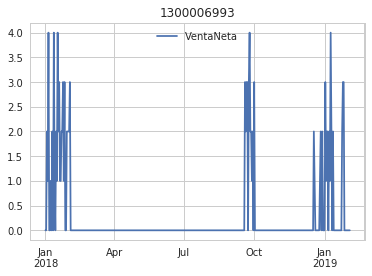

In [17]:
%%time
dicc_miraflores = extractor_21_27.populate_data(1200000044)

In [18]:
nulos = 0
for k, v in dicc_jesus_maria.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [19]:
nulos = 0
for k, v in dicc_callao.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [20]:
nulos = 0
for k, v in dicc_canto_grande.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [21]:
nulos = 0
for k, v in dicc_olivos.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [22]:
nulos = 0
for k, v in dicc_miraflores.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [23]:
%%time
dicc_jesus_maria = noise_control(dicc_jesus_maria)

Relacion Lineal :  1300005890 0 [0. 1. 1. 1. 1.] 1.0
()()  1300005890 0.97 = 3 ///  0.03 = 0
()()  1300005890 0.97 = 4 ///  0.03 = 0
()()  1300005890 0.97 = 3 ///  0.03 = 0
()()  1300005890 0.97 = 3 ///  0.03 = 0
()()  1300005890 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300005890 6 [0 0 0 0 0] 0
()()  1300007428 0.97 = 6 ///  0.03 = 1
()()  1300007428 0.95 = 6 ///  0.05 = 3
()()  1300007428 0.95 = 7 ///  0.05 = 3
()()  1300007428 0.95 = 7 ///  0.05 = 1
()()  1300007428 0.95 = 6 ///  0.05 = 0
Relacion Lineal :  1300007428 5 [1 1 1 1 1] 1
Relacion Lineal :  1300007428 6 [1 1 1 1 1] 1
()()  1300005892 0.97 = 5 ///  0.03 = 0
()()  1300005892 0.95 = 5 ///  0.05 = 1
()()  1300005892 0.97 = 5 ///  0.03 = 0
()()  1300005892 0.97 = 4 ///  0.03 = 0
()()  1300005892 0.95 = 4 ///  0.05 = 0
()()  1300005892 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300005892 6 [0 0 0 0 0] 0
()()  1300005897 0.97 = 4 ///  0.03 = 0
()()  1300005897 0.95 = 4 ///  0.05 = 0
()()  1300005897 0.97 = 5 ///  0.03 = 0
()(

In [24]:
%%time
dicc_callao = noise_control(dicc_callao)

()()  1300005395 0.97 = 5 ///  0.03 = 1
()()  1300005395 0.97 = 5 ///  0.03 = 0
()()  1300005395 0.97 = 5 ///  0.03 = 0
()()  1300005395 0.97 = 5 ///  0.03 = 0
()()  1300005395 0.97 = 6 ///  0.03 = 1
()()  1300005395 0.97 = 3 ///  0.03 = 0
()()  1300005395 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.97 = 3 ///  0.03 = 0
()()  1300003859 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.97 = 4 ///  0.03 = 0
()()  1300003859 0.95 = 4 ///  0.05 = 0
()()  1300003859 0.95 = 7 ///  0.05 = 2
()()  1300002841 0.97 = 6 ///  0.03 = 1
()()  1300002841 0.95 = 5 ///  0.05 = 0
()()  1300002841 0.95 = 6 ///  0.05 = 0
()()  1300002841 0.95 = 5 ///  0.05 = 0
()()  1300002841 0.95 = 5 ///  0.05 = 1
()()  1300002841 0.95 = 7 ///  0.05 = 1
()()  1300002841 0.95 = 6 ///  0.05 = 1
()()  1300005917 0.95 = 9 ///  0.05 = 3
()()  1300005917 0.95 = 8 ///  0.05 = 3
()()  1300005917 0.95 = 9 ///  0.05 = 3
()()  1300005917 0.95 = 8 ///  0.05 = 4


In [25]:
%%time
dicc_canto_grande = noise_control(dicc_canto_grande)

()()  1300000384 0.97 = 1 ///  0.03 = 0
()()  1300000384 0.97 = 1 ///  0.03 = 0
Relacion Lineal :  1300000384 2 [0 0 0 0 0] 0
Relacion Lineal :  1300000384 3 [0 0 0 0 0] 0
Relacion Lineal :  1300000384 4 [0 0 0 0 0] 0
Relacion Lineal :  1300000384 5 [0 0 0 0 0] 0
Relacion Lineal :  1300000384 6 [1. 1. 1. 1. 1.] 1.0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 2 ///  0.03 = 0
()()  1300003073 0.97 = 1 ///  0.03 = 0
()()  1300003073 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300013322 0 [0 1 1 1 1] 1
()()  1300013322 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300013322 2 [1 0 0 0 0] 0
()()  1300013322 0.97 = 2 ///  0.03 = 0
()()  1300013322 0.97 = 3 ///  0.03 = 0
Relacion Lineal :  1300013322 5 [0 0 0 0 0] 0
()()  1300013322 0.97 = 3 ///  0.03 = 0
()()  1300013323 0.97 = 2 ///  0.03 = 0
Relacion Lineal :  1300013323 1 [0 0 0 0 0] 0
Relacion Lineal :  

In [26]:
%%time
dicc_lince = noise_control(dicc_lince)

()()  1300001282 0.97 = 6 ///  0.03 = 0
Relacion Lineal :  1300001282 1 [1 0 0 0 0] 0
()()  1300001282 0.97 = 6 ///  0.03 = 0
()()  1300001282 0.97 = 5 ///  0.03 = 0
()()  1300001282 0.97 = 6 ///  0.03 = 0
()()  1300001282 0.95 = 6 ///  0.05 = 0
()()  1300001282 0.95 = 10 ///  0.05 = 2
()()  1300002821 0.9 = 22 ///  0.1 = 14
()()  1300002821 0.9 = 24 ///  0.1 = 11
()()  1300002821 0.9 = 22 ///  0.1 = 13
()()  1300002821 0.9 = 22 ///  0.1 = 13
()()  1300002821 0.9 = 25 ///  0.1 = 15
()()  1300002821 0.9 = 25 ///  0.1 = 12
()()  1300002821 0.9 = 40 ///  0.1 = 24
()()  1300005391 0.97 = 5 ///  0.03 = 0
()()  1300005391 0.97 = 4 ///  0.03 = 0
()()  1300005391 0.97 = 4 ///  0.03 = 0
()()  1300005391 0.97 = 4 ///  0.03 = 0
()()  1300005391 0.97 = 5 ///  0.03 = 0
()()  1300005391 0.97 = 4 ///  0.03 = 0
()()  1300005391 0.97 = 5 ///  0.03 = 0
()()  1300004879 0.95 = 13 ///  0.05 = 4
()()  1300004879 0.97 = 11 ///  0.03 = 5
()()  1300004879 0.95 = 12 ///  0.05 = 5
()()  1300004879 0.95 = 11 ///

In [27]:
%%time
dicc_olivos = noise_control(dicc_olivos)

()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.97 = 3 ///  0.03 = 0
()()  1300004353 0.97 = 2 ///  0.03 = 0
()()  1300004353 0.95 = 5 ///  0.05 = 1
()()  1300000792 0.95 = 6 ///  0.05 = 2
()()  1300000792 0.97 = 6 ///  0.03 = 2
()()  1300000792 0.97 = 5 ///  0.03 = 2
()()  1300000792 0.97 = 6 ///  0.03 = 3
()()  1300000792 0.97 = 6 ///  0.03 = 2
()()  1300000792 0.97 = 6 ///  0.03 = 2
()()  1300000792 0.95 = 12 ///  0.05 = 6
()()  1300000793 0.95 = 6 ///  0.05 = 2
()()  1300000793 0.97 = 6 ///  0.03 = 2
()()  1300000793 0.97 = 6 ///  0.03 = 2
()()  1300000793 0.97 = 6 ///  0.03 = 3
()()  1300000793 0.95 = 6 ///  0.05 = 3
()()  1300000793 0.97 = 5 ///  0.03 = 2
()()  1300000793 0.95 = 11 ///  0.05 = 7
()()  1300000299 0.95 = 9 ///  0.05 = 3
()()  1300000299 0.9 = 8 ///  0.1 = 5
()()  1300000299 0.95 = 9 ///  0.05 = 1
()()  1300000299 0.95 = 8 ///  0.05 = 3


In [28]:
%%time
dicc_miraflores = noise_control(dicc_miraflores)

()()  1300000001 0.95 = 7 ///  0.05 = 3
()()  1300000001 0.95 = 7 ///  0.05 = 3
()()  1300000001 0.97 = 7 ///  0.03 = 3
()()  1300000001 0.97 = 6 ///  0.03 = 3
()()  1300000001 0.97 = 7 ///  0.03 = 3
()()  1300000001 0.97 = 8 ///  0.03 = 4
()()  1300000001 0.95 = 7 ///  0.05 = 3
()()  1300003208 0.95 = 14 ///  0.05 = 7
()()  1300003208 0.95 = 13 ///  0.05 = 7
()()  1300003208 0.9 = 12 ///  0.1 = 7
()()  1300003208 0.95 = 12 ///  0.05 = 5
()()  1300003208 0.9 = 11 ///  0.1 = 7
()()  1300003208 0.9 = 9 ///  0.1 = 3
Relacion Lineal :  1300003208 6 [0 0 0 0 0] 0
()()  1300012436 0.95 = 6 ///  0.05 = 2
Relacion Lineal :  1300012436 1 [5 0 0 0 0] 0
()()  1300012436 0.97 = 6 ///  0.03 = 1
()()  1300012436 0.95 = 6 ///  0.05 = 1
()()  1300012436 0.95 = 5 ///  0.05 = 1
()()  1300012436 0.97 = 6 ///  0.03 = 0
()()  1300012436 0.97 = 4 ///  0.03 = 0
()()  1300000023 0.95 = 15 ///  0.05 = 9
()()  1300000023 0.97 = 14 ///  0.03 = 10
()()  1300000023 0.95 = 15 ///  0.05 = 10
()()  1300000023 0.9 = 1

# MODELAMIENTO

In [29]:
%%time
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

def modeling(dicc_data):
    dicc_result = {}
    for k, v in dicc_data.items():
        dicc_result[k] = {}
        for num_day, datus in v.items():
            datus = datus.apply(lambda val: 0.1 if val <= 0 else val)
            meann_4 = datus[-4:].mean()
            if meann_4 == datus[-1] and meann_4 == datus[-2] and meann_4 < 2:
                print("////P lineal :", k, num_day, datus[-5:].values, datus[-1])
                dicc_result[k][num_day] = datus[-1]
            else:
                try:                   
                    model = Holt(datus, exponential=False, damped=True).fit(optimized=True)
                    val = model.forecast(1)
                    print("HOLT : ",  k, num_day, datus[-5:].values, val)
                    dicc_result[k][num_day] = val
                except Exception as e:
                    print("ERROR : ", str(e))
                    model = SimpleExpSmoothing(datus).fit(optimized=True)
                    val = model.forecast(1)
                    print("Simple Exponencial : ",  k, num_day, datus[-5:].values, val)
                    dicc_result[k][num_day] = val
    return dicc_result

CPU times: user 27.1 ms, sys: 0 ns, total: 27.1 ms
Wall time: 27.2 ms


In [30]:
dicc_result_jesus_maria = modeling(dicc_jesus_maria)

////P lineal : 1300005890 0 [0.1 1.  1.  1.  1. ] 1.0
HOLT :  1300005890 1 [1. 1. 1. 1. 2.] 53    1.119462
dtype: float64
HOLT :  1300005890 2 [2. 2. 2. 1. 1.] 53    1.745275
dtype: float64
HOLT :  1300005890 3 [3. 2. 2. 2. 3.] 2019-01-24    1.681786
Freq: W-THU, dtype: float64
HOLT :  1300005890 4 [3. 1. 2. 2. 2.] 2019-01-25    1.229091
Freq: W-FRI, dtype: float64
HOLT :  1300005890 5 [0.1 0.1 0.1 2.  0.1] 2019-01-26    0.6
Freq: W-SAT, dtype: float64
////P lineal : 1300005890 6 [0.1 0.1 0.1 0.1 0.1] 0.1
HOLT :  1300007428 0 [4 4 1 5 3] 53    2.39818
dtype: float64
HOLT :  1300007428 1 [4. 5. 4. 4. 3.] 53    3.568082
dtype: float64
HOLT :  1300007428 2 [4 4 4 5 4] 53    4.281778
dtype: float64
HOLT :  1300007428 3 [4 4 4 4 2] 2019-01-24    3.456387
Freq: W-THU, dtype: float64
HOLT :  1300007428 4 [4. 4. 4. 4. 3.] 2019-01-25    3.13575
Freq: W-FRI, dtype: float64
////P lineal : 1300007428 5 [1. 1. 1. 1. 1.] 1.0
////P lineal : 1300007428 6 [1. 1. 1. 1. 1.] 1.0
HOLT :  1300005892 0 [3. 2

In [31]:
dicc_result_callao = modeling(dicc_callao)

HOLT :  1300005395 0 [2 2 3 2 2] 2019-01-21    2.254044
Freq: W-MON, dtype: float64
HOLT :  1300005395 1 [0.1 3.  0.1 0.1 1. ] 2019-01-22    0.905306
Freq: W-TUE, dtype: float64
HOLT :  1300005395 2 [2.  2.  1.  0.1 1. ] 2019-01-23    0.995801
Freq: W-WED, dtype: float64
HOLT :  1300005395 3 [2. 2. 1. 1. 2.] 2019-01-24    1.578568
Freq: W-THU, dtype: float64
HOLT :  1300005395 4 [2 2 2 3 3] 2019-01-25    2.546096
Freq: W-FRI, dtype: float64
HOLT :  1300005395 5 [2. 2. 2. 3. 2.] 2019-01-26    1.838703
Freq: W-SAT, dtype: float64
HOLT :  1300005395 6 [2. 3. 2. 2. 2.] 2019-01-27    2.05881
Freq: W-SUN, dtype: float64
HOLT :  1300003859 0 [1.  0.1 2.  1.  0.1] 2019-01-21    1.101782
Freq: W-MON, dtype: float64
HOLT :  1300003859 1 [1. 4. 2. 1. 1.] 2019-01-22    2.694458
Freq: W-TUE, dtype: float64
HOLT :  1300003859 2 [1. 2. 2. 1. 1.] 2019-01-23    1.35894
Freq: W-WED, dtype: float64
HOLT :  1300003859 3 [1. 4. 2. 2. 2.] 2019-01-24    1.841818
Freq: W-THU, dtype: float64
HOLT :  1300003859

In [32]:
dicc_result_canto_grande = modeling(dicc_canto_grande)

HOLT :  1300000384 0 [0.1 0.1 0.1 0.1 1. ] 54    0.238621
dtype: float64
HOLT :  1300000384 1 [0.1 1.  1.  0.1 0.1] 54    0.334381
dtype: float64
////P lineal : 1300000384 2 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300000384 3 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300000384 4 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300000384 5 [0.1 0.1 0.1 0.1 0.1] 0.1
////P lineal : 1300000384 6 [1. 1. 1. 1. 1.] 1.0
ERROR :  division by zero
Simple Exponencial :  1300003073 0 [1.  1.  1.  0.1 0.1] 8    0.1
dtype: float64
ERROR :  division by zero
Simple Exponencial :  1300003073 1 [1.  0.5 0.5 1.  1. ] 8    0.65
dtype: float64
ERROR :  division by zero
Simple Exponencial :  1300003073 2 [1.  1.  1.  0.1 0.1] 8    0.6625
dtype: float64
////P lineal : 1300003073 3 [0.1 1.  1.  1.  1. ] 1.0
HOLT :  1300003073 4 [1. 1. 1. 1. 2.] 2019-01-25    1.180485
Freq: W-FRI, dtype: float64
////P lineal : 1300003073 5 [0.1 1.  1.  1.  1. ] 1.0
HOLT :  1300003073 6 [2.  1.  1.  0.1 2. ] 2019-01-27    1.310426
F

In [33]:
dicc_result_lince = modeling(dicc_lince)

HOLT :  1300001282 0 [2.  6.  5.  0.1 4. ] 2019-01-21    3.461809
Freq: W-MON, dtype: float64
////P lineal : 1300001282 1 [1.  0.1 0.1 0.1 0.1] 0.1
HOLT :  1300001282 2 [3. 3. 2. 3. 2.] 2019-01-23    3.421831
Freq: W-WED, dtype: float64
HOLT :  1300001282 3 [2.  1.  5.  5.  0.1] 2019-01-24    3.357421
Freq: W-THU, dtype: float64
HOLT :  1300001282 4 [5. 2. 2. 5. 2.] 2019-01-25    4.315849
Freq: W-FRI, dtype: float64
HOLT :  1300001282 5 [3.  3.  0.1 3.  2. ] 2019-01-26    2.239875
Freq: W-SAT, dtype: float64
HOLT :  1300001282 6 [6. 7. 5. 7. 4.] 2019-01-27    5.60999
Freq: W-SUN, dtype: float64
HOLT :  1300002821 0 [14 20 20 14 20] 2019-01-21    17.876542
Freq: W-MON, dtype: float64
HOLT :  1300002821 1 [14 15 24 14 13] 2019-01-22    15.433006
Freq: W-TUE, dtype: float64
HOLT :  1300002821 2 [19 15 22 15 13] 2019-01-23    16.183647
Freq: W-WED, dtype: float64
HOLT :  1300002821 3 [20 14 18 13 14] 2019-01-24    16.046909
Freq: W-THU, dtype: float64
HOLT :  1300002821 4 [19 18 20 18 18] 

In [34]:
dicc_result_olivos = modeling(dicc_olivos)

HOLT :  1300004353 0 [1.  2.  2.  0.1 0.1] 2019-01-21    1.058251
Freq: W-MON, dtype: float64
HOLT :  1300004353 1 [1.  1.  2.  0.1 0.1] 2019-01-22    0.773714
Freq: W-TUE, dtype: float64
HOLT :  1300004353 2 [1.  0.1 1.  0.1 1. ] 2019-01-23    0.746482
Freq: W-WED, dtype: float64
HOLT :  1300004353 3 [2.  1.  1.  0.1 0.1] 2019-01-24    0.889091
Freq: W-THU, dtype: float64
HOLT :  1300004353 4 [0.1 2.  1.  0.1 0.1] 2019-01-25    0.841271
Freq: W-FRI, dtype: float64
HOLT :  1300004353 5 [1. 1. 2. 1. 1.] 2019-01-26    1.348975
Freq: W-SAT, dtype: float64
HOLT :  1300004353 6 [3. 4. 5. 5. 5.] 2019-01-27    3.398406
Freq: W-SUN, dtype: float64
HOLT :  1300000792 0 [6. 6. 5. 5. 6.] 2019-01-21    5.608074
Freq: W-MON, dtype: float64
HOLT :  1300000792 1 [5. 4. 4. 6. 6.] 2019-01-22    5.203607
Freq: W-TUE, dtype: float64
HOLT :  1300000792 2 [5 5 5 4 5] 2019-01-23    4.905122
Freq: W-WED, dtype: float64
HOLT :  1300000792 3 [5 6 5 6 6] 2019-01-24    5.656802
Freq: W-THU, dtype: float64
HOLT :

In [35]:
dicc_result_miraflores = modeling(dicc_miraflores)

HOLT :  1300000001 0 [5. 6. 4. 5. 3.] 2019-01-21    4.37754
Freq: W-MON, dtype: float64
HOLT :  1300000001 1 [3 4 5 3 6] 2019-01-22    4.267889
Freq: W-TUE, dtype: float64
HOLT :  1300000001 2 [3 4 5 4 4] 2019-01-23    3.991231
Freq: W-WED, dtype: float64
HOLT :  1300000001 3 [4 4 6 5 6] 2019-01-24    4.583634
Freq: W-THU, dtype: float64
HOLT :  1300000001 4 [4 5 7 4 4] 2019-01-25    4.329188
Freq: W-FRI, dtype: float64
HOLT :  1300000001 5 [5 4 6 7 5] 2019-01-26    5.062293
Freq: W-SAT, dtype: float64
HOLT :  1300000001 6 [4 3 5 6 5] 2019-01-27    5.116688
Freq: W-SUN, dtype: float64
HOLT :  1300003208 0 [ 9.  7. 11. 10. 12.] 2019-01-21    10.422939
Freq: W-MON, dtype: float64
HOLT :  1300003208 1 [ 7. 10. 10.  7.  7.] 2019-01-22    8.919383
Freq: W-TUE, dtype: float64
HOLT :  1300003208 2 [ 9. 10. 11. 10.  9.] 2019-01-23    8.944058
Freq: W-WED, dtype: float64
HOLT :  1300003208 3 [ 7. 10. 12. 11. 12.] 2019-01-24    10.394346
Freq: W-THU, dtype: float64
HOLT :  1300003208 4 [10.  9. 

# TABLA DE RESULTADOS

In [37]:
from compare_for_day_000 import compare_result, noise_control, calc_result

In [38]:
df_jesus_maria = calc_result(df, dicc_jesus_maria, dicc_result_jesus_maria, since_date_1, until_date_1,
                            export_name='HOLT_21_27_jmaria_0_0')

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [ ]:
df_callao = calc_result(df, dicc_callao, dicc_result_callao, since_date_1, until_date_1,
                       export_name='HOLT_21_27_callao_0_0')

In [ ]:
df_canto_grande = calc_result(df, dicc_canto_grande, dicc_result_canto_grande, since_date_1, until_date_1,
                             export_name='HOLT_21_27_ctogrande_0_0')

In [ ]:
df_olivos = calc_result(df, dicc_olivos, dicc_result_olivos, since_date_1, until_date_1,
                       export_name='HOLT_21_27_olivos_0_0')

In [ ]:
df_lince = calc_result(df, dicc_lince, dicc_result_lince, since_date_1, until_date_1,
                      export_name='HOLT_21_27_lince_0_0')

In [ ]:
df_miraflores = calc_result(df, dicc_miraflores, dicc_result_miraflores, since_date_1, until_date_1,
                           export_name='HOLT_21_27_miraflores_0_0')

# RESULTADOS

# CALLAO

In [ ]:
display(df_callao)

### CANTO GRANDE

In [ ]:
display(df_canto_grande)

### JESUS MARIA

In [ ]:
display(df_jesus_maria)

# OLIVOS

In [ ]:
display(df_olivos)

# LINCE

In [ ]:
display(df_lince)

# MIRAFLORES

In [ ]:
display(df_miraflores)

# GENERANDO REPORTE

In [ ]:
"""
def report_result(data, codigo_canilla, dicc_predict, order, name_csv):
    result = sorted(dicc_predict.items(), key=lambda _: _[0])
    
    result = pd.DataFrame(
        data=[_[1].values[0] if isinstance(_[1], pd.Series) else _[1] for _ in result],
        index=[_[0] for _ in result] 
    )
    result.columns = ['HotlWinters_seasonal_add']
    result['weekday'] = result.index
    
    old_result = pd.DataFrame(
        data[data['CodigoSapCanilla'] == codigo_canilla
            ][['VentaNeta', col_proy, 'weekday', 'Fecha']][since_date_1:until_date_1]
    )
    result = pd.merge(result, old_result, on='weekday', how='inner')
    result.index = result.Fecha
    result['codigo canilla'] = codigo_canilla
    del result['Fecha']
    del result['weekday']
    
    del old_result
    
    if order == 0:
        result.to_csv(name_csv, header=True)
    else:
        with open(name_csv, 'a') as f:
            result.to_csv(f, header=False)
"""

In [ ]:
"""
order = 0
name_csv = 'jesus_maria.csv'

for k, v in dicc_jesus_maria.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_jesus_maria[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

In [ ]:
"""
order = 0
name_csv = 'callao.csv'

for k, v in dicc_callao.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_callao[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

In [ ]:
"""
order = 0
name_csv = 'canto_grande.csv'

for k, v in dicc_canto_grande.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_canto_grande[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

In [ ]:
"""
order = 0
name_csv = 'lince.csv'

for k, v in dicc_lince.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_lince[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

In [ ]:
"""
order = 0
name_csv = 'olivos.csv'

for k, v in dicc_olivos.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_olivos[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

In [ ]:
"""
order = 0
name_csv = 'miraflores.csv'

for k, v in dicc_miraflores.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_miraflores[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""